## Tennesse Eastman Process Simulation Data for Anomaly Detection in Process Design using Machine Learning.

#### Basic Idea of TEP:

Tennesee Eastman Process is an industrial process widely used as a benchmark in test fault diagnosis and process control.

##### Case Studies:
* Plant Wide Control
* Statistical Process Monitoring
* Sensor fault detection
* Identification of data-driven models.
* Aim and Objective of the Project:

#### Our Aim:  To predict correct Fault between 1 to 20 as possible with high precision. 
#### Incorrect Fault detection will impact the cost of maintenance and waste worker's time in resolving incorrect fault.

### Some Basic information to know:
* Anomaly means something that deviates from what is standard, normal, or expected.

### Outline of the Project:
* Data Preprocessing
* EDA
* Feature Selection and Feature Engineering
* Model Building
* Hyperparameter Optimization
* Accuracy Check

### Importing the Datasets and modules/libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Fault_free Training

In [2]:
df_1=pd.read_csv(r'E:\Downloads\b1.csv')

In [3]:
df_1.head()

,Unnamed: 0,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [4]:
df_1.shape

(250000, 56)

In [5]:
df_1.columns

Index(['Unnamed: 0', 'faultNumber', 'simulationRun', 'sample', 'xmeas_1',
       'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7',
       'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13',
       'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19',
       'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25',
       'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31',
       'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37',
       'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2',
       'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10',
       'xmv_11'],
      dtype='object')

### Faulty Training

In [6]:
df_2=pd.read_csv(r'E:\Downloads\b2_cleaned.csv')

In [7]:
df_2.head()

,Unnamed: 0,Unnamed: 0.1,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,0,1,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,20,20,1,1.0,21,0.27833,3649.7,4479.9,9.3498,26.379,...,53.947,27.761,60.598,21.544,39.421,38.569,46.945,46.688,41.259,17.866
2,40,40,1,1.0,41,0.61338,3687.6,4476.9,9.0395,26.832,...,54.107,60.150,61.411,20.036,36.540,36.802,43.267,49.447,40.993,19.966
3,60,60,1,1.0,61,0.87669,3563.6,4525.4,8.5276,26.957,...,53.526,86.460,53.208,21.943,33.762,37.529,44.416,58.551,39.712,19.598
4,80,80,1,1.0,81,1.00520,3656.8,4364.4,8.0971,26.973,...,52.597,99.052,56.190,18.995,39.677,36.350,47.350,85.687,39.332,20.825


In [8]:
df_2.shape

(250000, 57)

In [9]:
frames_tr = [df_1,df_2]
train_ts = pd.concat(frames_tr)              # Train dataframe

In [10]:
train_ts=train_ts.drop(['Unnamed: 0.1'],axis=1)
train_ts

,Unnamed: 0,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,4999900,20.0,500.0,401,0.25761,3624.8,4447.1,9.4881,27.437,42.992,...,53.841,25.337,61.726,19.953,42.121,41.514,47.670,49.111,40.465,18.293
249996,4999920,20.0,500.0,421,0.23483,3597.1,4517.3,9.4082,27.000,42.347,...,53.085,23.287,62.828,20.087,40.700,41.643,51.499,47.162,40.308,15.601
249997,4999940,20.0,500.0,441,0.25245,3612.2,4573.5,9.2866,26.899,42.050,...,54.096,24.583,62.277,22.393,39.303,37.711,47.370,42.555,40.917,22.276
249998,4999960,20.0,500.0,461,0.28345,3602.5,4520.4,9.2761,27.099,42.129,...,54.869,27.969,61.878,17.172,38.734,39.852,49.790,42.957,40.084,19.646


In [11]:
#plt.hist(train_ts['xmv_5'])

## Testing Dataset

### Fault_free Testing

In [12]:
df_3=pd.read_csv(r'E:\Downloads\b3.csv')

In [13]:
df_3.head(3)

,Unnamed: 0,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,0,1.0,1,0.25171,3672.4,4466.3,9.5122,27.057,42.473,...,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,1,0,1.0,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586,...,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,2,0,1.0,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278,...,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452


In [14]:
df_3.shape

(480000, 56)

### Faulty Testing

In [15]:
df_4=pd.read_csv(r'E:\Downloads\b4_cleaned.csv')

In [16]:
df_4.head(3)

,Unnamed: 0,Unnamed: 0.1,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,5,5,1,1.0,6,0.29303,3691.7,4502.2,9.3780,27.111,...,53.595,28.898,59.107,22.291,38.673,39.890,47.571,47.430,41.308,19.134
1,15,15,1,1.0,16,0.29176,3713.7,4501.2,9.3591,26.744,...,53.998,28.450,60.255,22.152,38.096,34.711,45.437,47.058,41.889,14.375
2,25,25,1,1.0,26,0.23569,3763.0,4542.1,9.3545,26.791,...,53.072,23.044,60.923,20.512,39.828,33.462,45.205,47.776,40.019,19.951


In [17]:
df_4.shape

(500000, 57)

In [18]:
frames_df = [df_3,df_4]
test_df = pd.concat(frames_df)              

In [19]:
test_df=test_df.drop(['Unnamed: 0'],axis=1)
#test_df

In [20]:
test_df

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11,Unnamed: 0.1
0,0,1.0,1,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,...,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345,NaN
1,0,1.0,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,...,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063,NaN
2,0,1.0,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,...,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452,NaN
3,0,1.0,4,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,...,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123,NaN
4,0,1.0,5,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,...,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,20,500.0,456,0.25929,3692.7,4496.7,9.4536,27.045,42.429,2726.0,...,25.487,62.340,19.726,38.087,39.105,48.980,42.543,41.326,18.912,4999955.0
499996,20,500.0,466,0.24192,3669.0,4569.7,9.3145,26.777,42.561,2708.5,...,23.987,60.111,22.258,39.001,36.958,45.983,43.852,41.760,17.349,4999965.0
499997,20,500.0,476,0.33734,3664.0,4467.1,9.3074,27.026,42.273,2713.7,...,33.446,60.312,22.211,38.327,38.916,47.408,44.131,41.982,18.195,4999975.0
499998,20,500.0,486,0.23550,3668.6,4509.9,9.3334,26.810,42.276,2699.4,...,22.802,61.679,20.997,41.012,39.696,51.711,45.434,40.782,17.110,4999985.0


In [21]:
test_df['faultNumber'].value_counts()

0     480000
11     25000
19     25000
18     25000
17     25000
16     25000
15     25000
14     25000
13     25000
12     25000
10     25000
1      25000
9      25000
8      25000
7      25000
6      25000
5      25000
4      25000
3      25000
2      25000
20     25000
Name: faultNumber, dtype: int64

In [22]:
test_df.shape

(980000, 56)

In [23]:
final=[train_ts,test_df]
final_data=pd.concat(final)

In [24]:
#final_data

In [25]:
final_data['faulty/non-faulty']=0

In [26]:
final_data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11,faulty/non-faulty
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447,0
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194,0
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530,0
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089,0
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,20.0,500.0,456,0.25929,3692.7,4496.7,9.4536,27.045,42.429,2726.0,...,25.487,62.340,19.726,38.087,39.105,48.980,42.543,41.326,18.912,0
499996,20.0,500.0,466,0.24192,3669.0,4569.7,9.3145,26.777,42.561,2708.5,...,23.987,60.111,22.258,39.001,36.958,45.983,43.852,41.760,17.349,0
499997,20.0,500.0,476,0.33734,3664.0,4467.1,9.3074,27.026,42.273,2713.7,...,33.446,60.312,22.211,38.327,38.916,47.408,44.131,41.982,18.195,0
499998,20.0,500.0,486,0.23550,3668.6,4509.9,9.3334,26.810,42.276,2699.4,...,22.802,61.679,20.997,41.012,39.696,51.711,45.434,40.782,17.110,0


In [27]:
def encoder(z):
    if z==0:
        return 0 
    else:
        return 1
    
a=final_data['faulty/non-faulty']=final_data['faultNumber'].apply(encoder)

In [28]:
a.value_counts()

1    750000
0    730000
Name: faultNumber, dtype: int64

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='faultNumber', ylabel='count'>

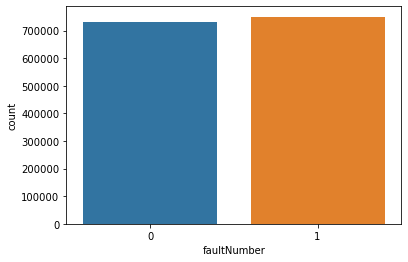

In [29]:
sns.countplot(a)

In [30]:
final_data.columns

Index(['Unnamed: 0', 'faultNumber', 'simulationRun', 'sample', 'xmeas_1',
       'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7',
       'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13',
       'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19',
       'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25',
       'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31',
       'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37',
       'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2',
       'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10',
       'xmv_11', 'Unnamed: 0.1', 'faulty/non-faulty'],
      dtype='object')

#### Final Dataset

In [32]:
df=final_data.drop(['Unnamed: 0','Unnamed: 0.1','faulty/non-faulty'],axis=1)
df

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,20.0,500.0,456,0.25929,3692.7,4496.7,9.4536,27.045,42.429,2726.0,...,54.446,25.487,62.340,19.726,38.087,39.105,48.980,42.543,41.326,18.912
499996,20.0,500.0,466,0.24192,3669.0,4569.7,9.3145,26.777,42.561,2708.5,...,54.433,23.987,60.111,22.258,39.001,36.958,45.983,43.852,41.760,17.349
499997,20.0,500.0,476,0.33734,3664.0,4467.1,9.3074,27.026,42.273,2713.7,...,53.831,33.446,60.312,22.211,38.327,38.916,47.408,44.131,41.982,18.195
499998,20.0,500.0,486,0.23550,3668.6,4509.9,9.3334,26.810,42.276,2699.4,...,53.690,22.802,61.679,20.997,41.012,39.696,51.711,45.434,40.782,17.110


C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sample'>

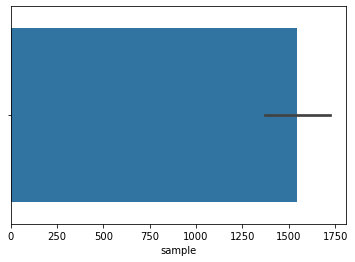

In [41]:
sns.barplot(df['sample'].value_counts())

In [50]:
df['simulationRun'].value_counts()

1.0      2960
330.0    2960
343.0    2960
342.0    2960
341.0    2960
         ... 
162.0    2960
161.0    2960
160.0    2960
159.0    2960
500.0    2960
Name: simulationRun, Length: 500, dtype: int64

(array([148000., 148000., 148000., 148000., 148000., 148000., 148000.,
        148000., 148000., 148000.]),
 array([  1. ,  50.9, 100.8, 150.7, 200.6, 250.5, 300.4, 350.3, 400.2,
        450.1, 500. ]),
 <BarContainer object of 10 artists>)

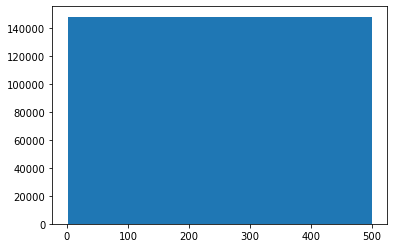

In [49]:
plt.hist(df['simulationRun'])

(array([767500.,  75000.,  75000.,  75000.,  75000.,  75000.,  75000.,
         75000.,  75000., 112500.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

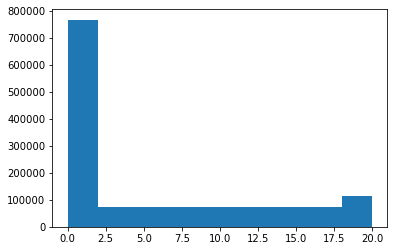

In [43]:
plt.hist(df['faultNumber'])

(array([246000., 236000., 246000., 236000., 236000.,  88000.,  48000.,
         48000.,  48000.,  48000.]),
 array([  1. ,  96.9, 192.8, 288.7, 384.6, 480.5, 576.4, 672.3, 768.2,
        864.1, 960. ]),
 <BarContainer object of 10 artists>)

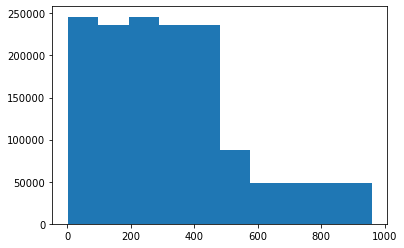

In [42]:
plt.hist(df['sample'])

In [48]:
df['sample'].value_counts()

1      11000
281    11000
266    11000
261    11000
256    11000
       ...  
650      500
649      500
648      500
647      500
960      500
Name: sample, Length: 960, dtype: int64

(array([730000.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 750000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

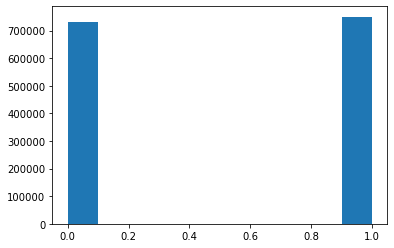

In [34]:
#sns.distplot(df['faulty/non-faulty'])

plt.hist(df['faulty/non-faulty'])

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='faulty/non-faulty', ylabel='Density'>

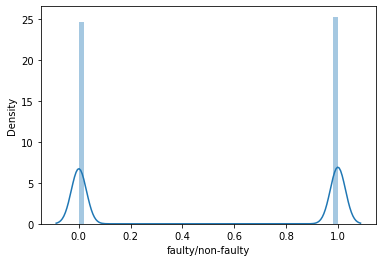

In [42]:
sns.distplot(df['faulty/non-faulty'])

## Exploratory Data Analysis

#### To see the Nan Values

In [45]:
c=df.isnull().isnull()

In [48]:
c.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11,faulty/non-faulty
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
import missingno as msno

<AxesSubplot:>

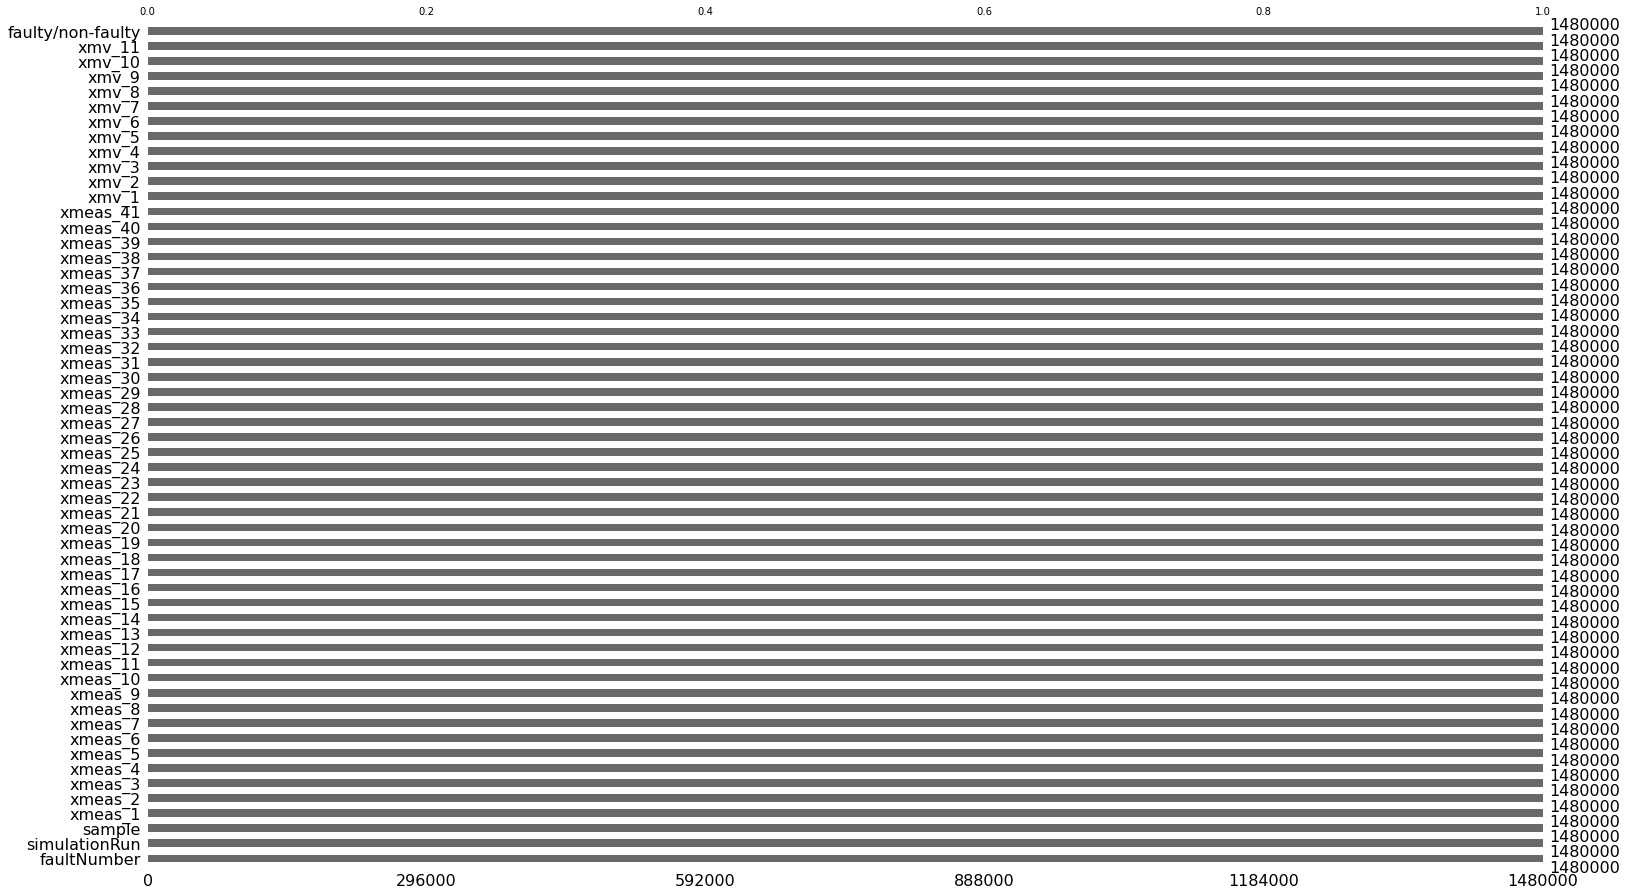

In [37]:
msno.bar(df)

* There are no null values in our final dataset.
* On the top of the plot, the y-axis scale ranges from 0.0 to 1.0, where 1.0 represents 100% data completeness. If the bar is less than this, it indicates that we have missing values within that column.
* On the right side of the plot, there are a series of numbers that represent the total count of the non-null values within that column

In [71]:
df.columns

Index(['faultNumber', 'simulationRun', 'sample', 'xmeas_1', 'xmeas_2',
       'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8',
       'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14',
       'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20',
       'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26',
       'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32',
       'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38',
       'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4',
       'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11',
       'faulty/non-faulty'],
      dtype='object')

In [ ]:
sns.boxplot(x=df['xmeas_29'],y=df['faulty/non-faulty'])

<AxesSubplot:xlabel='xmeas_29', ylabel='faulty/non-faulty'>

### To see the normal distribution

* Using the Shapiro-Wilk test with an alpha level 0.05 let's count the number of features that have almost normal distribution. 
* If the statistics is above the given alpha level then we should accept null hypothesis (distribution is normal) and reject otherwise.
* Null Hypothesis : " Distribution is Normal " --> Accept the Null Hypothesis (when p >=0.05) 

In [32]:
alpha = 0.05

def get_shapiro(df, cols, fault_number):
    shapiro_history = []
    for i in range(len(cols)):
        data = df[(df.faultNumber==fault_number) & (df.simulationRun.isin(range(9)))][cols[i]]
        #data = np.log(data)
        shapiro = stats.shapiro(data)
        shapiro_history.append(shapiro)
    return shapiro_history

def plot_shapiro(shapiro_history):
    W,p = zip(*shapiro_history)
    plt.plot(p)
    plt.axhline(y=alpha, color='r', linestyle='-')
    plt.title('p_value >= {0} for {1} features'.format(alpha, len([i for i in p if i >= alpha])))
    plt.xlabel('feature')
    plt.ylabel('p_value')
    plt.show()

* For Non-faulty (Normal Operating Condition)

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


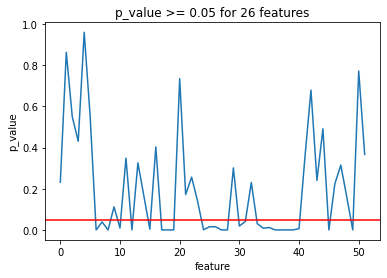

In [35]:
from scipy import stats
from scipy.stats import shapiro

total_shapiro = get_shapiro(df, df.columns[3:55], fault_number=0)                   #For normal operating conditions
plot_shapiro(total_shapiro)

w,p_values = zip(*total_shapiro)
faultless_cond = pd.DataFrame(index=df.columns[3:55],columns=['isNormal']).fillna(False)

i=0
for p in p_values:
    if p >= 0.05:
        faultless_cond.iloc[i] = True
    i+=1

* So for 26 features, the statistics value is greater than alpha value. We can say that 26 features are normally distributed.

* Faulty Condition

In [46]:
all_shap = []
for fault in range(1,21):
    shap = get_shapiro(df, df.columns[3:55], fault_number=fault)
    all_shap.append(shap)

In [47]:
fault_numbers = []
skewed_features = pd.DataFrame(index=df.columns[3:55],columns=['frequency']).fillna(0)

for i in range(20):
    w,p_values = zip(*all_shap[i])
    p_count = len([a for a in p_values if a >= 0.05])
    #print("%d -> %d" % (i + 1, p_count))
    if (p_count < 20):
        fault_numbers.append(i+1)
        
    feature_number = 0
    for p in p_values:
        if p < 0.05:
            skewed_features.iloc[feature_number] += 1
        feature_number+=1

#print("------------")
#print(len(fault_numbers))

In [59]:
len(skewed_features)

52

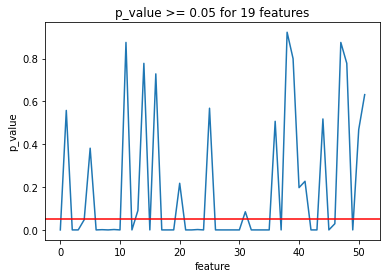

In [52]:
faulty_shapiro = get_shapiro(df, df.columns[3:55], fault_number=1)           #for fault number 1.
plot_shapiro(faulty_shapiro)

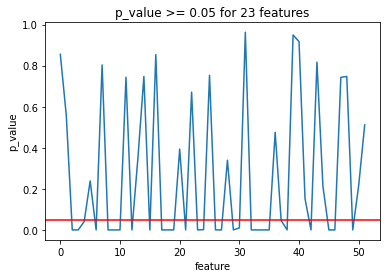

In [48]:
faulty_shapiro = get_shapiro(df, df.columns[3:55], fault_number=2)               #for fault number 2.
plot_shapiro(faulty_shapiro)

* Fault 2 — 12 features are still normal

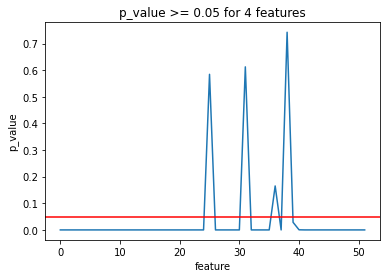

In [49]:
faulty_shapiro = get_shapiro(df, df.columns[3:55], fault_number=6)
plot_shapiro(faulty_shapiro)

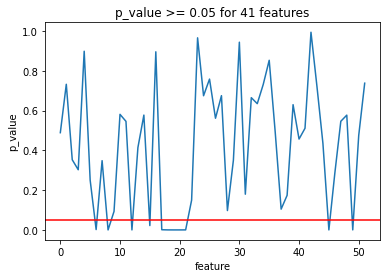

In [50]:
faulty_shapiro = get_shapiro(df, df.columns[3:55], fault_number=20)
plot_shapiro(faulty_shapiro)

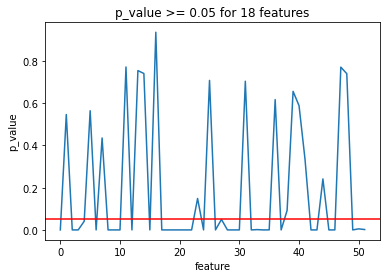

In [51]:
faulty_shapiro = get_shapiro(df, df.columns[3:55], fault_number=5)
plot_shapiro(faulty_shapiro)

* Most of the features are normally distributed.

##### Graphical Method to see the normal distribution: QQ (Quantile-Quantile) Plot.
 * Quantiles=particular part of a dataset i.e. a quantile determines how many values in a distribution are above or below a certain limit.
     * QQ Plot - When Quantiles of two varibles are plottted against each other. 

In [32]:
from scipy import stats
def qqplot_by_fault(data_df, cols, fault_number):
    plt.figure(figsize=(14,14))
    
    for i in range(len(cols)):
        ax = plt.subplot(4, 4, i+1)
        data = data_df[(data_df.faultNumber==fault_number) & (data_df.simulationRun.isin(range(10)))][cols[i]]
        
        #data = np.log(data)
        
        stats.probplot(x=data, plot=plt)
        ax.set_title(cols[i])
        ax.set_xlabel('')
        ax.set_ylabel('')
        shapiro = stats.shapiro(data)
        ax.text(0.99, 0.01, '{0:.4f}'.format(shapiro[1]),
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='green', fontsize=15)
        
    plt.show()

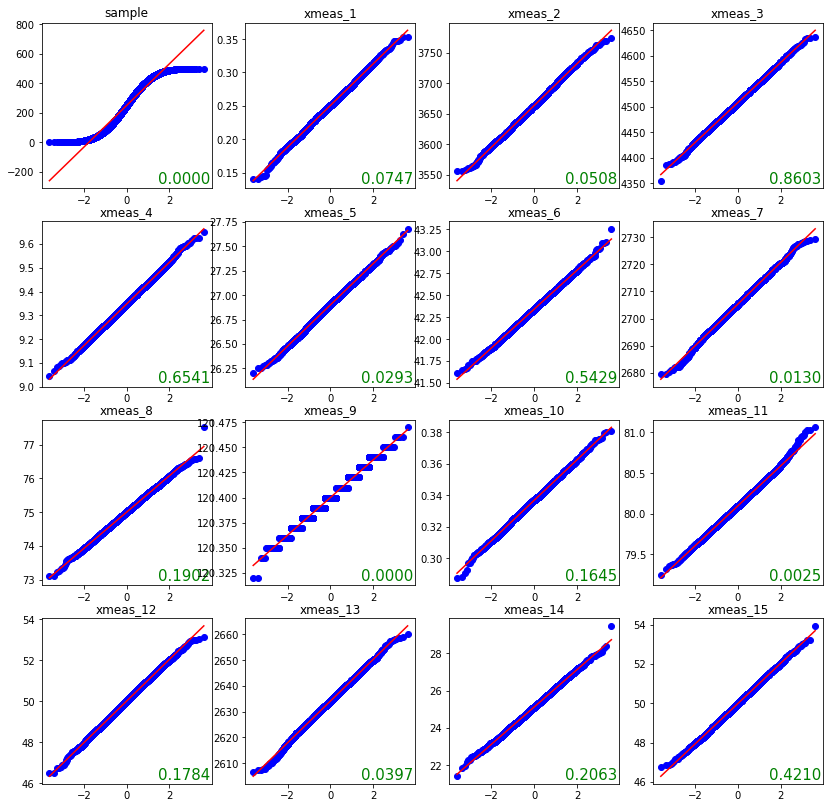

In [33]:
qqplot_by_fault(train_ts, train_ts.columns[3:19], fault_number=0)

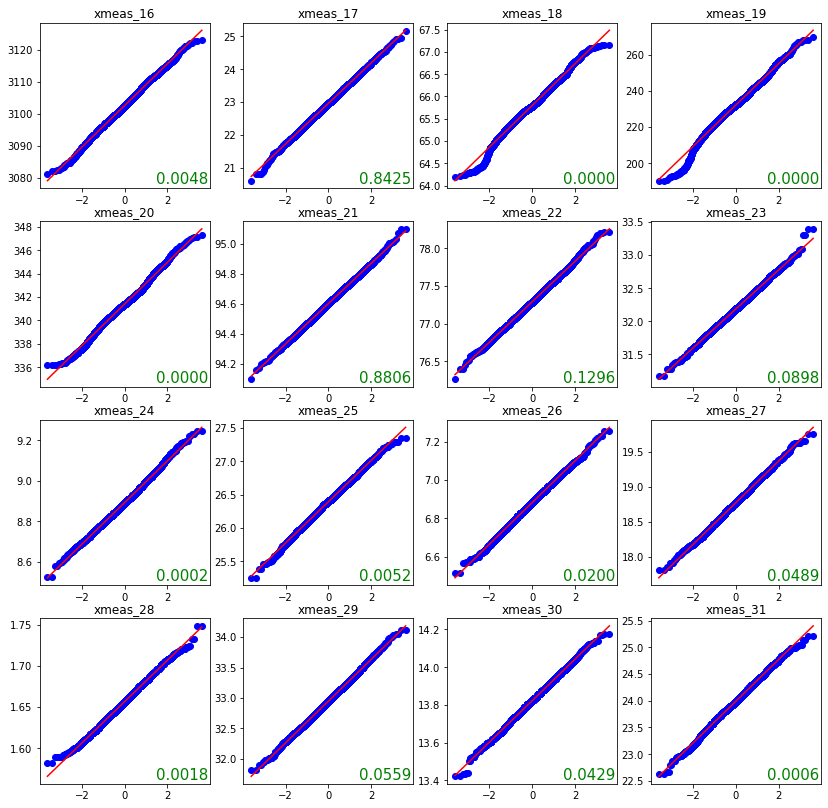

In [34]:
qqplot_by_fault(train_ts, train_ts.columns[19:35], fault_number=0)

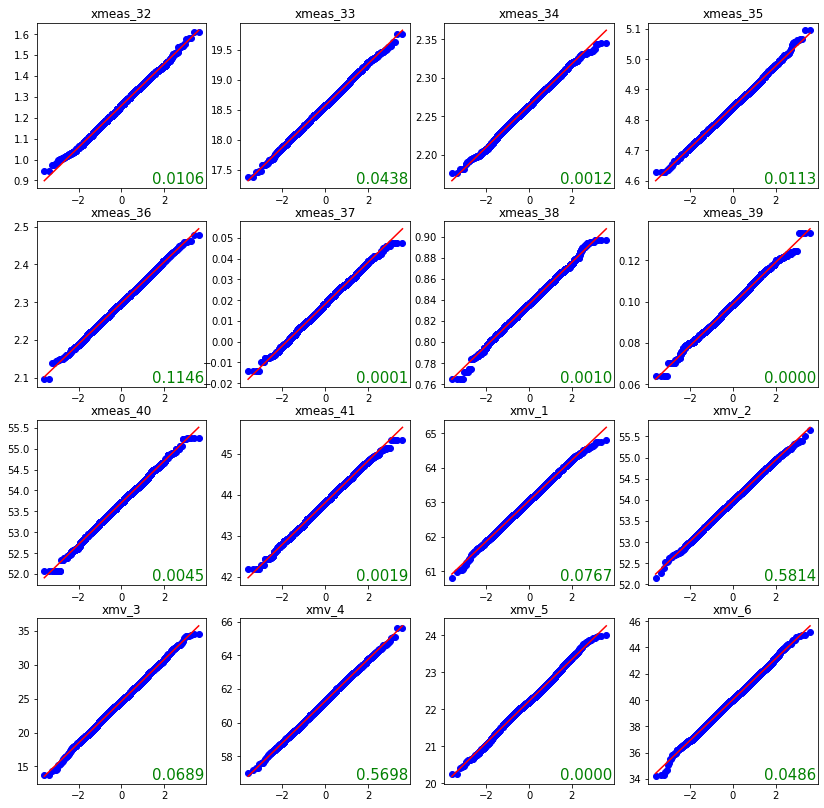

In [35]:
qqplot_by_fault(train_ts, train_ts.columns[35:51], fault_number=0)

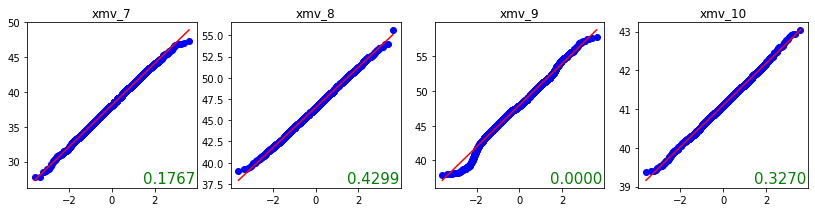

In [36]:
qqplot_by_fault(train_ts, train_ts.columns[51:55], fault_number=0)

## Feature Engineering-Feature Selection 

In [32]:
df

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11,faulty/non-faulty
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447,0
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194,0
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530,0
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089,0
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,20.0,500.0,456,0.25929,3692.7,4496.7,9.4536,27.045,42.429,2726.0,...,25.487,62.340,19.726,38.087,39.105,48.980,42.543,41.326,18.912,1
499996,20.0,500.0,466,0.24192,3669.0,4569.7,9.3145,26.777,42.561,2708.5,...,23.987,60.111,22.258,39.001,36.958,45.983,43.852,41.760,17.349,1
499997,20.0,500.0,476,0.33734,3664.0,4467.1,9.3074,27.026,42.273,2713.7,...,33.446,60.312,22.211,38.327,38.916,47.408,44.131,41.982,18.195,1
499998,20.0,500.0,486,0.23550,3668.6,4509.9,9.3334,26.810,42.276,2699.4,...,22.802,61.679,20.997,41.012,39.696,51.711,45.434,40.782,17.110,1


In [35]:
df['faultNumber'].corr(df['faulty/non-faulty'])

0.7877588631344372

In [34]:
df.corr()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11,faulty/non-faulty
faultNumber,1.000000e+00,1.120555e-14,-2.692254e-01,-0.110297,0.018020,0.009132,0.116416,-0.000040,0.047059,0.098888,...,-0.062635,0.110997,0.051098,-0.119216,-0.009164,-0.015177,0.013538,0.026284,0.045408,7.877589e-01
simulationRun,1.120555e-14,1.000000e+00,-1.410332e-14,0.000871,-0.000720,-0.000531,-0.000975,0.001343,-0.000453,-0.000388,...,0.000593,-0.000988,-0.001443,0.000571,0.005689,0.002031,0.000846,-0.002110,-0.000387,1.192599e-14
sample,-2.692254e-01,-1.410332e-14,1.000000e+00,-0.023826,0.011164,0.017970,0.025602,0.000513,0.013174,-0.009094,...,-0.060759,0.011563,0.018100,-0.030910,-0.001580,0.001429,-0.030459,0.001554,0.001924,-3.417611e-01
xmeas_1,-1.102972e-01,8.705579e-04,-2.382577e-02,1.000000,-0.131549,-0.152060,-0.551521,0.007458,-0.113730,-0.471402,...,0.336767,-0.413006,-0.193204,0.289434,0.028263,0.059093,0.004052,-0.105002,-0.158325,4.902753e-02
xmeas_2,1.801958e-02,-7.203192e-04,1.116415e-02,-0.131549,1.000000,0.352494,0.219813,-0.001615,0.219945,0.113337,...,-0.270454,0.046847,0.107990,0.041215,-0.049445,-0.030292,-0.204861,0.036075,-0.062187,-2.964317e-04
xmeas_3,9.131753e-03,-5.307895e-04,1.796999e-02,-0.152060,0.352494,1.000000,0.130286,-0.000588,0.114154,0.011445,...,-0.528298,-0.110914,0.106627,0.209729,-0.081300,-0.028566,-0.590987,-0.080870,-0.167265,-1.842663e-02
xmeas_4,1.164157e-01,-9.751913e-04,2.560201e-02,-0.551521,0.219813,0.130286,1.000000,0.005293,0.531881,0.464537,...,-0.252259,0.537423,0.305381,-0.140057,-0.063013,-0.061834,-0.045228,0.132905,0.043134,4.276089e-02
xmeas_5,-3.977850e-05,1.342512e-03,5.130475e-04,0.007458,-0.001615,-0.000588,0.005293,1.000000,0.025157,-0.008893,...,-0.007369,0.001803,0.047067,0.006517,-0.001424,0.002345,-0.004903,-0.004276,-0.009592,-2.668860e-03
xmeas_6,4.705903e-02,-4.529759e-04,1.317392e-02,-0.113730,0.219945,0.114154,0.531881,0.025157,1.000000,0.210390,...,-0.115107,0.283154,0.178354,0.026272,-0.045101,-0.034140,-0.043321,0.065893,-0.022773,4.761412e-02
xmeas_7,9.888804e-02,-3.880407e-04,-9.094075e-03,-0.471402,0.113337,0.011445,0.464537,-0.008893,0.210390,1.000000,...,0.379732,0.652842,0.353890,-0.643801,-0.028863,-0.112070,0.301116,0.203443,0.374722,1.624178e-01


In [39]:
df.corr().style.background_gradient(axis=0)

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,xmeas_11,xmeas_12,xmeas_13,xmeas_14,xmeas_15,xmeas_16,xmeas_17,xmeas_18,xmeas_19,xmeas_20,xmeas_21,xmeas_22,xmeas_23,xmeas_24,xmeas_25,xmeas_26,xmeas_27,xmeas_28,xmeas_29,xmeas_30,xmeas_31,xmeas_32,xmeas_33,xmeas_34,xmeas_35,xmeas_36,xmeas_37,xmeas_38,xmeas_39,xmeas_40,xmeas_41,xmv_1,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11,faulty/non-faulty
faultNumber,1.000000,0.000000,-0.269225,-0.110297,0.018020,0.009132,0.116416,-0.000040,0.047059,0.098888,-0.068610,0.003753,-0.078743,-0.098848,-0.009164,0.088276,-0.024147,-0.015177,0.079177,-0.005059,0.063697,0.103041,0.038016,-0.193326,-0.177850,0.056463,-0.094979,0.023709,-0.053243,-0.101202,0.038534,0.060842,-0.097076,0.019137,-0.055251,-0.105717,0.034300,-0.080594,-0.068623,-0.006823,-0.062952,0.004036,-0.025198,0.024745,0.131638,0.131919,-0.062635,0.110997,0.051098,-0.119216,-0.009164,-0.015177,0.013538,0.026284,0.045408,0.787759
simulationRun,0.000000,1.000000,-0.000000,0.000871,-0.000720,-0.000531,-0.000975,0.001343,-0.000453,-0.000388,0.001305,-0.000300,0.000068,0.000457,0.005690,-0.000444,0.000677,0.002031,-0.000275,-0.001204,-0.000464,-0.000217,-0.000289,0.000326,0.001083,-0.000417,0.003788,-0.001913,-0.000418,0.001087,0.000574,-0.000310,0.002577,-0.000740,-0.000143,0.002287,0.000489,-0.000950,-0.002484,0.000070,0.001237,-0.003806,0.005039,-0.004078,0.000583,-0.002433,0.000593,-0.000988,-0.001443,0.000571,0.005689,0.002031,0.000846,-0.002110,-0.000387,0.000000
sample,-0.269225,-0.000000,1.000000,-0.023826,0.011164,0.017970,0.025602,0.000513,0.013174,-0.009094,-0.002605,-0.003534,-0.022842,0.003302,-0.001580,-0.006354,-0.001483,0.001428,-0.015297,0.005070,-0.005126,-0.008090,0.040959,0.005523,0.022801,0.036103,-0.032056,-0.017992,-0.009529,-0.019520,0.009639,0.035767,-0.033293,-0.019760,-0.018308,-0.020608,0.012179,0.002895,0.007753,-0.006075,-0.027013,-0.005239,-0.018160,0.014521,0.036999,0.024884,-0.060759,0.011563,0.018100,-0.030910,-0.001580,0.001429,-0.030459,0.001554,0.001924,-0.341761
xmeas_1,-0.110297,0.000871,-0.023826,1.000000,-0.131549,-0.152060,-0.551521,0.007458,-0.113730,-0.471402,0.099783,0.035064,0.133772,0.445233,0.028262,-0.474009,0.078981,0.059093,-0.443650,0.038176,0.134983,-0.185144,-0.130585,0.057728,0.202375,0.096760,0.322370,-0.400954,0.175856,0.368999,0.157483,0.082714,0.331734,-0.382681,0.213953,0.401635,0.184056,0.425499,0.376846,0.037362,0.209148,0.080709,0.046608,-0.024735,-0.259969,-0.155166,0.336767,-0.413006,-0.193204,0.289434,0.028263,0.059093,0.004052,-0.105002,-0.158325,0.049028
xmeas_2,0.018020,-0.000720,0.011164,-0.131549,1.000000,0.352494,0.219813,-0.001615,0.219945,0.113337,0.017086,0.064291,0.116268,-0.067284,-0.049445,0.129304,-0.106052,-0.030293,0.046996,-0.014233,-0.057731,-0.052469,0.392935,-0.210180,0.085194,0.301051,-0.215782,-0.023033,-0.158230,-0.385423,-0.150792,0.309876,-0.206214,-0.044575,-0.275702,-0.387268,-0.134784,-0.060009,-0.022647,-0.066504,-0.365219,-0.146160,-0.101170,0.117105,0.277919,0.317948,-0.270454,0.046847,0.107990,0.041215,-0.049445,-0.030292,-0.204861,0.036075,-0.062187,-0.000296
xmeas_3,0.009132,-0.000531,0.017970,-0.152060,0.352494,1.000000,0.130286,-0.000588,0.114154,0.011445,0.303895,-0.068545,0.263555,0.043571,-0.081301,0.036321,-0.171109,-0.028565,-0.101809,-0.033194,-0.366458,-0.409135,0.604752,-0.194285,0.205503,0.514913,-0.261479,-0.112588,-0.130565,-0.591009,-0.295916,0.533979,-0.281179,-0.140523,-0.337542,-0.611355,-0.268277,0.027329,0.107499,-0.094824,-0.622799,-0.234143,-0.277259,0.316406,0.223609,0.531183,-0.528298,-0.110914,0.106627,0.209729,-0.081300,-0.028566,-0.590987,-0.080870,-0.167265,-0.018427
xmeas_4,0.116416,-0.000975,0.025602,-0.551521,0.219813,0.130286,1.000000,0.005293,0.531881,0.464537,-0.631253,0.025964,0.146582,-0.342925,-0.063012,0.481329,-0.145586,-0.061833,0.386078,0.042396,0.138590,0.319899,0.481061,-0.237631,0.063421,0.248490,-0.395112,0.19105

In [40]:
X=df.drop(['faulty/non-faulty'],axis=1)
y=df['faulty/non-faulty']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [42]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=df.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
            return col_corr

In [46]:
corr_features=correlation(X,0.5)

In [47]:
len(set(corr_features))

0

In [49]:
cor=df.corr()
cor_target=abs(cor['faulty/non-faulty'])

In [220]:
relevant_features=cor_target[cor_target>0.00001]

In [232]:
len(relevant_features


faultNumber          0.787759
sample               0.341761
xmeas_1              0.049028
xmeas_2              0.000296
xmeas_3              0.018427
xmeas_4              0.042761
xmeas_5              0.002669
xmeas_6              0.047614
xmeas_7              0.162418
xmeas_8              0.057510
xmeas_9              0.004756
xmeas_10             0.075272
xmeas_11             0.138995
xmeas_12             0.003473
xmeas_13             0.153892
xmeas_14             0.014858
xmeas_15             0.020145
xmeas_16             0.166609
xmeas_17             0.012147
xmeas_18             0.076067
xmeas_19             0.139096
xmeas_20             0.066538
xmeas_21             0.086861
xmeas_22             0.126224
xmeas_23             0.088861
xmeas_24             0.041480
xmeas_25             0.141615
xmeas_26             0.033470
xmeas_27             0.046399
xmeas_28             0.155955
xmeas_29             0.087755
xmeas_30             0.053725
xmeas_31             0.140854
xmeas_32  

In [231]:
p.index

Index(['faultNumber', 'sample', 'xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4',
       'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10',
       'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16',
       'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22',
       'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28',
       'xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34',
       'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40',
       'xmeas_41', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6',
       'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11', 'faulty/non-faulty'],
      dtype='object')

In [223]:
len(relevant_features)

55

## Model Building

In [33]:
df.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [34]:
X=df.drop(['faultNumber'],axis=1)
y=df['faultNumber']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Applying Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred=log_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,y_pred)

0.9819887387387387

* Accuracy of 98 %.

### Applying Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [44]:
y_pred=clf.predict(X_test)

In [63]:
s=pd.DataFrame(y_pred,columns=['Fault_Type'])
s.sample(10)

,Fault_Type
398825,0.0
295902,0.0
213464,0.0
239534,0.0
39644,0.0
233849,18.0
360065,0.0
292586,0.0
413613,2.0
352173,0.0


In [54]:
accuracy_score(y_test,y_pred)

0.5464481981981982

* Accuracy of 99 %.

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[218820,    174],
       [     0, 225006]], dtype=int64)

### Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
model = GNBclf.fit(X_train,y_train)

In [65]:
y_pred=model.predict(X_test)

In [66]:
y_pred

array([5., 0., 1., ..., 0., 0., 0.])

In [67]:
s=pd.DataFrame(y_pred,columns=['Fault_Type'])
s.sample(10)

,Fault_Type
11770,6.0
367813,0.0
138262,0.0
298869,0.0
262802,0.0
45819,0.0
10069,0.0
308661,19.0
247436,7.0
388850,0.0


In [41]:
accuracy_score(y_test,y_pred)

0.7076058558558559

* Accuracy score of 99 % 

### XGBoost

In [51]:
import xgboost as xgb

In [52]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:04:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
y_pred=xgb_classifier.predict(X_test)

In [54]:
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [55]:
accuracy_score(y_test,y_pred)

1.0

* Accuracy of 100 %.

In [202]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
recall_score(y_test,y_pred)

0.999995555674071

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(X_test)

In [189]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[218994,      0],
       [     0, 225006]], dtype=int64)

In [194]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,y_pred,y_test)

In [110]:
y_pred=clf.predict(test_norm)

In [111]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9995

In [113]:
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix

In [117]:
#plot_confusion_matrix(clf,y_pred,y_test)

In [61]:
#def error_per(p):
    #perc=(int(p)/20)*100
    #return perc

#b=final_data['faultNumber']=final_data['faultNumber'].apply(error_per)


In [62]:
#b.value_counts()

RandomForestClassifier(max_depth=2, random_state=0)

In [103]:
y_pred=clf.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [105]:
pd.Series(y_pred)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
443995    0.0
443996    0.0
443997    0.0
443998    0.0
443999    0.0
Length: 444000, dtype: float64

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5441148648648648

In [102]:
c=pd.DataFrame(y_pred)
c.sample()

,0
118624,0.0


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# model fitting and hyperparameter tuning using gridsearch

clf_h=RandomForestClassifier()
#weights = np.linspace(0.05, 0.95, 20)
prams={
     'n_estimators':[100,200,500],
     'max_depth':[15,20,25,30,35]#,'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    
    
}
model=GridSearchCV(x_cfl,param_grid=prams,verbose=10,n_jobs=-1,scoring='f1_micro',cv=3)
model.fit(X,y)
print("Best estimator is", model.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
